In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

import matplotlib.pyplot as plt
import tweepy

ModuleNotFoundError: No module named 'pandas_datareader'

In [ ]:
company = 'AAPL'

start = dt.datetime(2005, 1, 1)
end = dt.datetime(2020, 12, 27)

data = web.DataReader(company, 'stooq', start, end)

# print(type(data))
# print(data)

# data['Close'].values.reshape(-1, 1)


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x - prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [ ]:
x = 20
y = 0.2

model = Sequential()

model.add(LSTM(units=x, return_sequences=True, input_shape=(x_train.shape[1], 1) ))
model.add(Dropout(y))
model.add(LSTM(units=x, return_sequences=True))
model.add(Dropout(y))
model.add(LSTM(units=x))
model.add(Dropout(y))
model.add(Dense(units=1)) # Prediction of the next closing day

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
124/124 [==============================] - 14s 67ms/step - loss: 0.0073
Epoch 2/25
124/124 [==============================] - 8s 67ms/step - loss: 0.0013
Epoch 3/25
124/124 [==============================] - 8s 68ms/step - loss: 0.0011
Epoch 4/25
124/124 [==============================] - 8s 67ms/step - loss: 9.9412e-04
Epoch 5/25
124/124 [==============================] - 8s 67ms/step - loss: 9.2342e-04
Epoch 6/25
124/124 [==============================] - 8s 66ms/step - loss: 8.9010e-04
Epoch 7/25
124/124 [==============================] - 8s 67ms/step - loss: 9.2163e-04
Epoch 8/25
124/124 [==============================] - 8s 67ms/step - loss: 8.2941e-04
Epoch 9/25
124/124 [==============================] - 8s 67ms/step - loss: 6.9363e-04
Epoch 10/25
124/124 [==============================] - 8s 66ms/step - loss: 7.0912e-04
Epoch 11/25
124/124 [==============================] - 8s 67ms/step - loss: 7.4166e-04
Epoch 12/25
124/124 [==============================] - 8s 67ms/

In [ ]:
# Test Data

test_start = dt.datetime(2021, 1, 1)
test_end = dt.datetime.now()

test_data = web.DataReader(company, 'stooq', test_start, test_end)

actual_price = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']))
# print(total_dataset)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values

model_inputs = model_inputs.reshape(-1, 1)
# print(model_inputs)

model_inputs = scaler.transform(model_inputs)
# print(model_inputs)



In [ ]:
# x_train = []
# y_train = []

# for x in range(prediction_days, len(scaled_data)):
#   x_train.append(scaled_data[x - prediction_days:x, 0])
#   y_train.append(scaled_data[x, 0])

# x_train = np.array(x_train)
# y_train = np.array(y_train)

# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))





In [ ]:
predicted_prices = model.predict(x_test)

predicted_prices = scaler.inverse_transform(predicted_prices)
# print(predicted_prices)

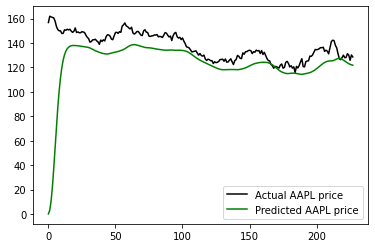

In [ ]:
plt.plot(actual_price, color="black", label=f"Actual {company} price")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} price")
plt.legend()
plt.savefig('APPL_Stock_Prediction.png')
plt.show()